Jeremy Foley Project #2


 Global Optmization Using Modified Simulated Annealing and LJ Clusters:
 
 Simulated Annealing is a form of optimization that finds global maxima and golobal minima.  This algorithm simulates small random displacement of an atom that results in a change in energy.  
 
My idea was to use techniques learned in class to write an original code and test that against the scipy basin-hopping code. 

The techniques used where:

-Using python code to pull information from a url

-Implimenting jit from numba

-Using LJ algorithm to return energies

-Modifying the Simulated Annealing code




In [27]:
from scipy.optimize import minimize
from numba import jit
import warnings
warnings.filterwarnings("ignore")

@jit
def simulated_annealling(N_atom, Max_iteration, kT, variable):
    pos_now = init_pos(N_atom)
    res = minimize(total_energy, pos_now, method='BFGS', tol=1e-3)        
    obj_now = res.fun
    accept_count = 0
    values = []
    
    for i in range(Max_iteration):
        pos_new = neighbor(pos_now, kT)
        res = minimize(total_energy, pos_new, method='BFGS', tol=1e-3)        
        obj_new = res.fun
        ap = acceptance_probability(obj_new-obj_now, kT)
        if obj_new - obj_now < .0001: #first iteration we have the same obj new and obj now so it is less than .1
            kT = kT + variable
        else:
            kT = .5
        if ap > np.random.random():
            print('accept new energy: ', obj_new,"\n", "Step Size: ", kT, "\n")
            obj_now = obj_new
            pos_now = pos_new
            accept_count += 1
            values.append(obj_new)
    return pos_now, obj_now, accept_count, kT, values, min(values), len(values) 
 
    
simulated_annealling(N_atom=12, Max_iteration=35, kT =.5, variable = .1)

accept new energy:  -34.76714878929639 
 Step Size:  0.6 

accept new energy:  -36.087048046146606 
 Step Size:  0.7 

accept new energy:  -36.2331500016743 
 Step Size:  0.6 

accept new energy:  -35.78416173267893 
 Step Size:  0.5 

accept new energy:  -35.159416805321165 
 Step Size:  0.5 

accept new energy:  -35.115579856886484 
 Step Size:  0.5 

accept new energy:  -36.30679095617042 
 Step Size:  0.6 

accept new energy:  -33.98674092914476 
 Step Size:  0.5 

accept new energy:  -34.47548361233056 
 Step Size:  0.6 

accept new energy:  -36.253205302122254 
 Step Size:  0.6 

accept new energy:  -36.15162604422253 
 Step Size:  0.5 

accept new energy:  -36.087048048045475 
 Step Size:  0.5 

accept new energy:  -36.24302589513569 
 Step Size:  0.6 

accept new energy:  -37.96759955275413 
 Step Size:  0.6 

accept new energy:  -37.967599515108766 
 Step Size:  0.6 



(array([8.14350716, 6.09474036, 3.50258145, 5.1498109 , 4.68821562,
        3.76562628, 5.36919941, 5.8673107 , 3.53275362, 5.95941779,
        8.59555176, 7.30168425, 8.33233076, 4.77633795, 4.63685206,
        6.75108902, 3.90720932, 4.79863257, 6.72989771, 6.2250363 ,
        4.26104565, 7.75279031, 5.87148653, 4.67230036, 6.14246041,
        5.8131128 , 5.16868273, 5.18302703, 3.42867707, 3.65256401,
        6.59999519, 7.13694033, 5.85665299, 7.48429173, 5.19521144,
        6.35156776]),
 -37.967599515108766,
 15,
 0.6,
 [-34.76714878929639,
  -36.087048046146606,
  -36.2331500016743,
  -35.78416173267893,
  -35.159416805321165,
  -35.115579856886484,
  -36.30679095617042,
  -33.98674092914476,
  -34.47548361233056,
  -36.253205302122254,
  -36.15162604422253,
  -36.087048048045475,
  -36.24302589513569,
  -37.96759955275413,
  -37.967599515108766],
 -37.96759955275413,
 15)

This demonstrates how the code is run.  This differs frome the normal Simulated Annealing code by allowing the algorithm to 
make more and more aggressive steps in order to move out of a potential well. 

In [1]:
import numpy as np
from numba import jit
import pandas as pd


def get_true_LJ(N):
    url = "http://doye.chem.ox.ac.uk/jon/structures/LJ/points/"+str(N)
    names = ['x', 'y', 'z']
    dataset = pd.read_csv(url, names=names, delim_whitespace=True)
    pos = dataset.values
    pos = np.reshape(pos, [N*3,1])
    return total_energy(pos)

@jit
def LJ(r):
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12 - 1/r6)

@jit
def total_energy(positions):
  
    E = 0
    N_atom = int(len(positions)/3)

   
    for i in range(N_atom-1):
        for j in range(i+1, N_atom):
            pos1 = positions[i*3:(i+1)*3]
            pos2 = positions[j*3:(j+1)*3] 
           
            dist = np.linalg.norm(pos1-pos2)
            E += LJ(dist)
    return E
@jit            
def init_pos(N, L=5):
    return L*np.random.random_sample((N*3,))

@jit
def neighbor(pos_now, kT):
    N = len(pos_now)
    return pos_now + kT*np.random.random_sample((N,))
@jit
def acceptance_probability(dE, kT):
    if dE<0:
        return 1
    else:
        return np.exp(-dE/kT)
    
from scipy.optimize import minimize
from numba import jit
import warnings
warnings.filterwarnings("ignore")

@jit
def simulated_annealling(N_atom, Max_iteration, kT, variable, atol):
    pos_now = init_pos(N_atom)
    true_energy = get_true_LJ(N_atom)
    _iter = 0
    obj_now = 0 
    
    while (_iter < Max_iteration and np.abs(true_energy - obj_now) > atol):
    # for i in range(Max_iteration):
        pos_new = neighbor(pos_now, kT)
      
        res = minimize(total_energy, pos_new, method='BFGS', tol=1e-3)        
        obj_new = res.fun
        ap = acceptance_probability(obj_new-obj_now, kT)
        if obj_new - obj_now < .0001: #first iteration we have the same obj new and obj now so it is less than .1
            kT = kT + variable
        else:
            kT = .5
        if ap > np.random.random():
            # print('accept new energy: ', obj_new,"\n", 'Acceptance Probability: ', ap, "\n", "Step Size: ", kT, "\n")
            obj_now = obj_new
            pos_now = pos_new
            _iter += 1

    return (obj_new, pos_new)    
    # return  pos_now, obj_now, accept_count, kT, values, min(values), len(values) 
# simulated_annealling(N_atom=12, Max_iteration=35, kT =.5, variable = .1)    

In [2]:
energy, pos = simulated_annealling(N_atom=12, Max_iteration=50, kT =.5, variable = .1, atol = 1e-3)  

In [3]:
print(energy, pos)

-37.967599558270905 [2.83585645 5.48218455 7.43044891 3.17404106 2.92752017 2.95441503
 7.19596618 2.59440377 3.243291   6.96221192 3.15831919 2.64491932
 5.73147987 5.51932288 6.62597749 3.48940339 5.74371634 7.20225206
 6.48955479 5.64983916 3.5698375  5.7614     1.56355736 4.348159
 5.35526703 2.90909982 3.03135875 5.74769291 6.49843726 3.81419732
 2.5764014  4.37935927 7.12379976 4.3067284  5.42154474 3.56346924]


The above represents the modified code finding the global minimum, and then pulling the positions from an online data base.

In [19]:
%timeit -n 2 -r 3 simulated_annealling(N_atom=12, Max_iteration=50, kT =.5, variable = .1, atol = 1e-3)  

8.79 s ± 1.43 s per loop (mean ± std. dev. of 3 runs, 2 loops each)


In [5]:
from scipy.optimize import basinhopping

N_atom = 12
pos = init_pos(N_atom)
%timeit -n 2 -r 3 cresres = basinhopping(total_energy, pos, niter=50, T=2.0, stepsize=3.0, disp=False)

17.6 s ± 107 ms per loop (mean ± std. dev. of 3 runs, 2 loops each)


Comparing the times of both codes for 12 atoms the modified code ran much faster than the basinhopping scipy code. 

<IPython.core.display.Javascript object>


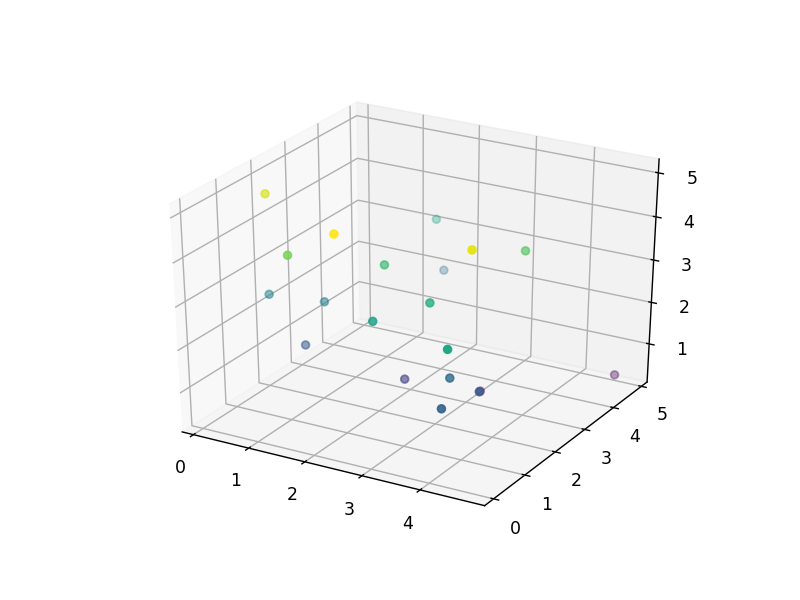

20 20 20


In [20]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d


def test(A):
    ax = plt.axes(projection='3d')
    x = []
    y = []
    z = []

    for i in range(len(A)):
        if i % 3 == 0:
            x.append(A[i])
        if i % 3 == 1:
            y.append(A[i])
        if i % 3 == 2:
            z.append(A[i])
    print(len(x),len(y),len(z))
    ax.scatter3D(x, y, z, c=z)#, cmap='Greens');
    
test(pos)

In [7]:
energy, pos = simulated_annealling(N_atom=15, Max_iteration=50, kT =.5, variable = .1, atol = 1e-3)  

In [8]:
print(energy, pos)

-52.32262723188413 [5.32309577 7.86660936 5.09857821 9.87420208 7.35292421 4.84739345
 4.43836358 5.74736043 7.12007283 7.54557467 7.55293191 5.22044397
 3.64313859 6.927918   7.96305413 6.43102111 5.51331434 5.3726633
 7.7406002  5.11229523 4.95670715 6.87933611 4.31559943 6.91589514
 5.6699748  7.43089711 7.23763879 4.91723726 5.08930564 7.86088631
 7.15654699 8.56294018 6.38642596 6.28305703 9.52437554 8.27751363
 3.83840819 6.8366689  6.04383458 7.37906991 5.48860202 8.49420161
 7.63811612 5.74733564 6.98601379]


In [9]:
%timeit -n 2 -r 3 simulated_annealling(N_atom=15, Max_iteration=50, kT =.5, variable = .1, atol = 1e-3)  

11.1 s ± 6.71 s per loop (mean ± std. dev. of 3 runs, 2 loops each)


In [22]:
from scipy.optimize import basinhopping
N_atom = 15
pos = init_pos(N_atom)
%timeit -n 2 -r 3 cres = basinhopping(total_energy, pos, niter=50, T=1.0, stepsize=0.5, disp=False)

41.8 s ± 3.44 s per loop (mean ± std. dev. of 3 runs, 2 loops each)


<IPython.core.display.Javascript object>


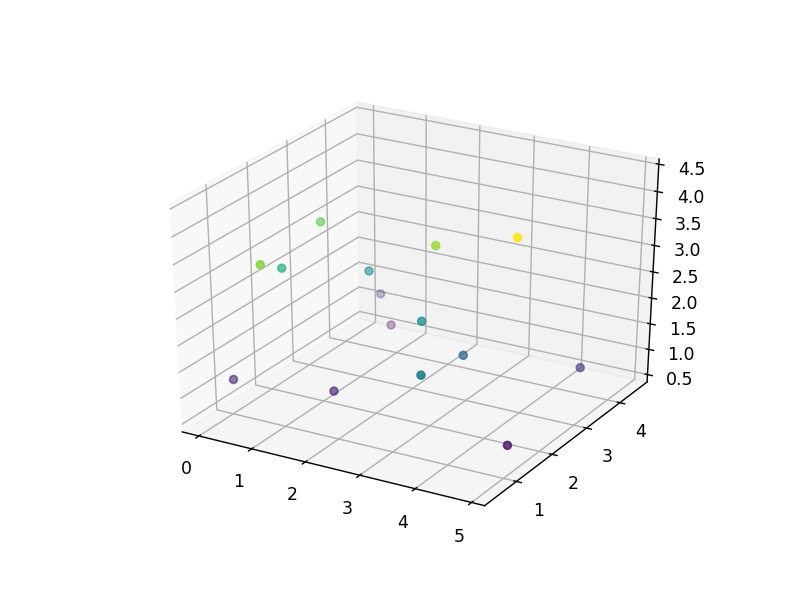

15 15 15


In [11]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d


def test(A):
    ax = plt.axes(projection='3d')
    x = []
    y = []
    z = []

    for i in range(len(A)):
        if i % 3 == 0:
            x.append(A[i])
        if i % 3 == 1:
            y.append(A[i])
        if i % 3 == 2:
            z.append(A[i])
    print(len(x),len(y),len(z))
    ax.scatter3D(x, y, z, c=z)#, cmap='Greens');
    
test(pos)

In [12]:
energy, pos = simulated_annealling(N_atom=17, Max_iteration=50, kT =.5, variable = .1, atol = 1e-3)  

In [13]:
print(energy, pos)

-61.317994631080985 [ 8.86831723  7.91738171 11.26192499 11.58342999 11.8449707  10.9400019
 12.83878384  7.77092465 11.77647642  8.45020772 10.31144044 11.46293497
  8.79434442 12.09661325 13.28435685 13.32952912  8.16789417  9.5247516
 10.13817251 12.46485162 11.81538785 10.62840984 12.01825905 10.96298332
 13.2646969   8.0892412  10.68757864 10.02349634 12.79964417  7.6642955
 12.01512993  9.62614343 12.82931904 10.25401203 10.62977056 12.39468684
 11.4371688   9.59552065 11.16391395  8.1180341  12.68584614 11.16832443
 10.75804299  8.37971095 13.1937633  11.0194822   9.13013073  8.88590847
 10.7424014  13.0510576   8.00269701]


In [21]:
%timeit -n 2 -r 3 simulated_annealling(N_atom=17, Max_iteration=50, kT =.5, variable = .1, atol = 1e-3)  

59.5 s ± 13.6 s per loop (mean ± std. dev. of 3 runs, 2 loops each)


In [15]:
from scipy.optimize import basinhopping
N_atom = 17
pos = init_pos(N_atom)
%timeit -n 2 -r 3 cres = basinhopping(total_energy, pos, niter=50, T=1.0, stepsize=0.5, disp=False)

1min 2s ± 1.6 s per loop (mean ± std. dev. of 3 runs, 2 loops each)


<IPython.core.display.Javascript object>


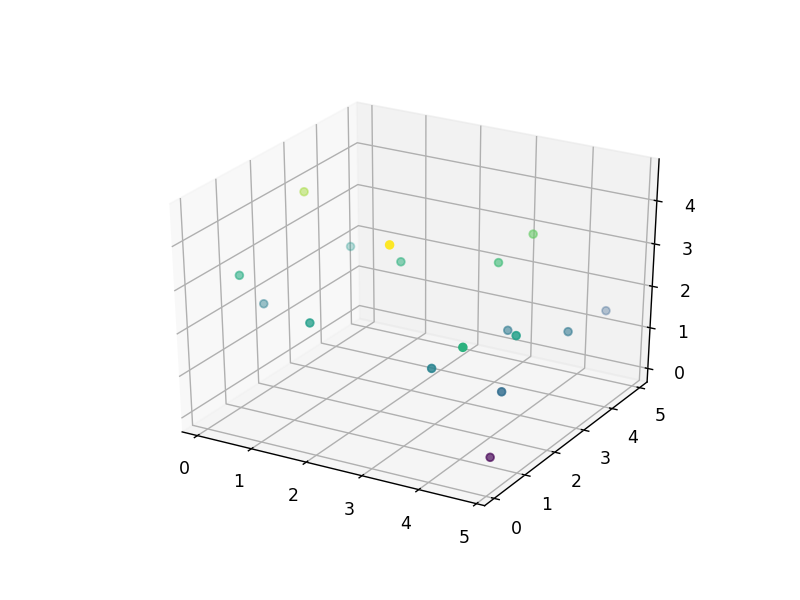

17 17 17


In [16]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d


def test(A):
    ax = plt.axes(projection='3d')
    x = []
    y = []
    z = []

    for i in range(len(A)):
        if i % 3 == 0:
            x.append(A[i])
        if i % 3 == 1:
            y.append(A[i])
        if i % 3 == 2:
            z.append(A[i])
    print(len(x),len(y),len(z))
    ax.scatter3D(x, y, z, c=z)#, cmap='Greens');
    
test(pos)

In [17]:
%timeit -n 2 -r 3 simulated_annealling(N_atom=20, Max_iteration=50, kT =.5, variable = .1, atol = 1e-3) 

3min 37s ± 47.2 s per loop (mean ± std. dev. of 3 runs, 2 loops each)


In [18]:
from scipy.optimize import basinhopping
N_atom = 20
pos = init_pos(N_atom)
%timeit -n 2 -r 3 cres = basinhopping(total_energy, pos, niter=50, T=1.0, stepsize=0.5, disp=False)

1min 39s ± 3.24 s per loop (mean ± std. dev. of 3 runs, 2 loops each)
